In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # To access gdrive files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
from scipy.spatial.distance import euclidean
from google.colab.patches import cv2_imshow

In [ ]:
def get_path_list(root_path):
    person_name = os.listdir(root_path)
    return person_name

In [ ]:
def get_class_id(root_path, train_names):
    face_list = []
    class_list = []

    for idx, name in enumerate(train_names):
        full_path = root_path + '/' + name

        for img_name in os.listdir(full_path):
            img_full_path = full_path + '/' + img_name
            img = cv2.imread(img_full_path)

            face_list.append(img)
            class_list.append(idx)

    return face_list, class_list

In [ ]:
def detect_train_faces_and_filter(image_list, image_classes_list):
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Portofolio/Project/Semester 5/Computer Vision/Project/haarcascade_frontalface_default.xml')

    gray_face_list = []
    filtered_class_list = []
    
    count = 0

    for idx, name in enumerate(image_list):

        gray = cv2.cvtColor(name, cv2.COLOR_BGR2GRAY)

        detected_face = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

        if len(detected_face) < 1:
            continue
        
        for face_rect in detected_face:

            count += 1
            x,y,h,w = face_rect
            face_img = gray[y:y+h, x:x+w]

            gray_face_list.append(face_img)
            filtered_class_list.append(image_classes_list[idx])

    return gray_face_list, filtered_class_list

In [ ]:
def detect_test_faces_and_filter(image_list):
    test_face = []
    test_rect = []

    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Portofolio/Project/Semester 5/Computer Vision/Project/haarcascade_frontalface_default.xml')

    for img_name in image_list:
        img_gray = cv2.cvtColor(img_name, cv2.COLOR_BGR2GRAY)

        detected_face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)

        if len(detected_face) < 1:
            continue

        for face_rect in detected_face:
            x,y,h,w = face_rect
            face_img = img_gray[y:y+h, x:x+w]
            test_face.append(face_img)
            test_rect.append(face_rect)

    return test_face, test_rect

In [ ]:
def train(train_face_grays, image_classes_list):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(train_face_grays, np.array(image_classes_list))
    return face_recognizer

In [ ]:
def get_test_images_data(test_root_path):
    face_list = []

    for img_name in os.listdir(test_root_path):
        full_img_path = test_root_path + '/' + img_name
        img = cv2.imread(full_img_path)
        face_list.append(img)

    return face_list

In [ ]:
def predict(recognizer, test_faces_gray):
    results = []

    for img_name in test_faces_gray:

        res, confidence = recognizer.predict(img_name)
        results.append(res)

    return results

In [ ]:
def draw_prediction_results(predict_results, test_image_list, test_faces_rects, train_names, size):
    resize_list = []
    for idx, img in enumerate(test_image_list):

        x,y,h,w = test_faces_rects[idx]

        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)
        text = train_names[predict_results[idx]] 
        cv2.putText(img, text, (x,y-10), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
        width = int(size)
        height = int(size)
        dim = (width, height)
        resize = cv2.resize(img, dim)
        resize_list.append(resize)

        cv2_imshow(resize)
        cv2.waitKey(0)

    return np.array(resize_list)

In [ ]:
def combine_and_show_result(image_list, size):
    final_image = ''
    for idx, img in enumerate(image_list):

        if(idx == 0):
            final_image = img
        else:
            final_image = np.hstack((final_image, img))
        

    cv2_imshow(final_image)
    cv2.waitKey(0)

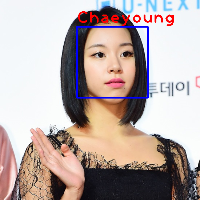

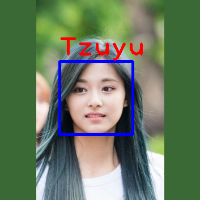

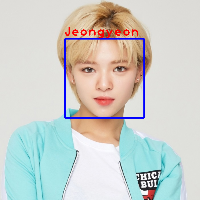

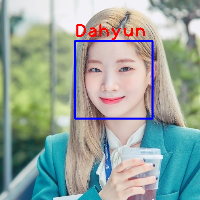

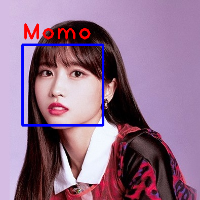

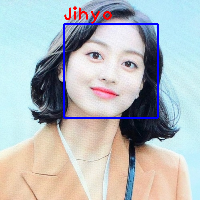

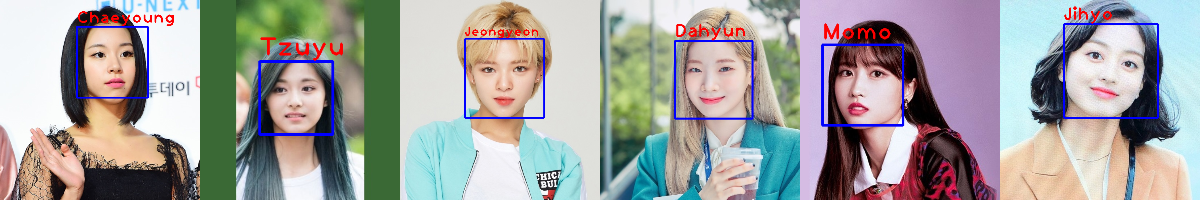

In [ ]:
train_root_path = '/content/drive/MyDrive/Portofolio/Project/Semester 5/Computer Vision/Project/dataset/train'

train_names = get_path_list(train_root_path)
train_image_list, image_classes_list = get_class_id(train_root_path, train_names)
train_face_grays, filtered_classes_list = detect_train_faces_and_filter(train_image_list, image_classes_list)
recognizer = train(train_face_grays, filtered_classes_list)

test_root_path = '/content/drive/MyDrive/Portofolio/Project/Semester 5/Computer Vision/Project/dataset/test'

test_image_list = get_test_images_data(test_root_path)
test_faces_gray, test_faces_rects = detect_test_faces_and_filter(test_image_list)
predict_results = predict(recognizer, test_faces_gray)
predicted_test_image_list = draw_prediction_results(predict_results, test_image_list, test_faces_rects, train_names, 200)

combine_and_show_result(predicted_test_image_list, 200)